## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest.
2. Write a short description of the data you chose, and why. (1 page)
3. Load the data using Pandas. Clean them up for EDA. Do this in a notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations. (1-3 pages)
5. Describe your findings in 1-2 pages.
6. If you have other content that you think absolutely must be included, you can include it in an appendix of any length.

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.

Feel free to work with other people in groups, and ask questions!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import os
current_directory = os.getcwd()
print(current_directory)


C:\Users\karan\OneDrive\Desktop\College_Stuff\ds_ml\EDA\lab


In [2]:
# 1: Download Data:
df = pd.read_excel('./GSS.xlsx') # Filed located in same folder


# 2: Explain Why I chose Data

year: I chose this because I wanted to see how mindsets and beliefs changed over the past 50 years. <br>
id_: This was to give each response a unique identifer. <br>
wrkstat: I chose this variable just in case I wanted to see how working status has changed over time. <br>
marital: I was interested in seeing marital patterns over differnt groups. <br>
divorce: I wanted to see divorce patterns over different groups, specifcally race. <br>
age: I wanted to use age mostly as a filter as some variables (like marital status) matter more at certain ages.
educ: I chose this variable because I was interested on how level of education impacts different view points and other variables. <br>
sex: I chose sex because I wanted to see how the work status of different genders have changed. As well as other view points such as party. <br>
race: I chose race because I wanted to see each variable changes with each different race. It will help me try to uncover societal restrictions. <br>
homepop: I chose homepop because I want to if different groups of people have more people in their house. I know certain cultures believe in a multigenerational house holds.<br>
partyid: This variable is one of the most interesting to me as I want to see how a person's political party impacts their view, also what groups are more likely to be a certain party. <br>
spkrac: I chose this variable because I was interested to see what groups are ok with racists speaking in their neighborhood. There is no variable for holding racist tendencies, but this variable would help me see which groups are ok with racists. I also wanted to see how this changes over time. <br>
spkhomo: I chose the variable spkhomo due to similar reasons as spkrac. I wanted to see what groups are ok with a "homosexual" speaking in their neighborhood. It is a good indication of LGBTQ+ acceptence. <br>
relig: I chose relig because it would be intersting to see how different religions have different view points and behavior. I would like to graph religion with most of the variables in the chart.<br>
ballot: this variable came with the data set and will be dropped. 

In [3]:
#3: Clean data
df.head()

,year,id_,wrkstat,marital,divorce,age,educ,sex,race,hompop,partyid,spkrac,spkhomo,relig,ballot
0,1972,1,Working full time,Never married,.i: Inapplicable,23,4 years of college,FEMALE,White,1,"Independent, close to democrat",.i: Inapplicable,.i: Inapplicable,Jewish,.i: Inapplicable
1,1972,2,Retired,Married,NO,70,10th grade,MALE,White,2,Not very strong democrat,.i: Inapplicable,.i: Inapplicable,Catholic,.i: Inapplicable
2,1972,3,Working part time,Married,NO,48,12th grade,FEMALE,White,4,"Independent (neither, no response)",.i: Inapplicable,.i: Inapplicable,Protestant,.i: Inapplicable
3,1972,4,Working full time,Married,NO,27,5 years of college,FEMALE,White,2,Not very strong democrat,.i: Inapplicable,.i: Inapplicable,Other,.i: Inapplicable
4,1972,5,Keeping house,Married,NO,61,12th grade,FEMALE,White,2,Strong democrat,.i: Inapplicable,.i: Inapplicable,Protestant,.i: Inapplicable


In [4]:
df_updated = df.drop('ballot', axis=1).copy() 
# dropping ballot because it is not useful to any of the data I want to visualize
df_updated.head()

,year,id_,wrkstat,marital,divorce,age,educ,sex,race,hompop,partyid,spkrac,spkhomo,relig
0,1972,1,Working full time,Never married,.i: Inapplicable,23,4 years of college,FEMALE,White,1,"Independent, close to democrat",.i: Inapplicable,.i: Inapplicable,Jewish
1,1972,2,Retired,Married,NO,70,10th grade,MALE,White,2,Not very strong democrat,.i: Inapplicable,.i: Inapplicable,Catholic
2,1972,3,Working part time,Married,NO,48,12th grade,FEMALE,White,4,"Independent (neither, no response)",.i: Inapplicable,.i: Inapplicable,Protestant
3,1972,4,Working full time,Married,NO,27,5 years of college,FEMALE,White,2,Not very strong democrat,.i: Inapplicable,.i: Inapplicable,Other
4,1972,5,Keeping house,Married,NO,61,12th grade,FEMALE,White,2,Strong democrat,.i: Inapplicable,.i: Inapplicable,Protestant


In [5]:
# year

# the year variable does not need to be clened

column_name = 'year'

unique_values = df_updated[column_name].unique()
print(unique_values) 







value_counts = df_updated[column_name].value_counts() # had to check that there were enough 89+ to not just remove it

print(value_counts)






[1972 1973 1974 1975 1976 1977 1978 1980 1982 1983 1984 1985 1986 1987
 1988 1989 1990 1991 1993 1994 1996 1998 2000 2002 2004 2006 2008 2010
 2012 2014 2016 2018 2021 2022]
2006    4510
2021    4032
2022    3544
1994    2992
1996    2904
2016    2867
1998    2832
2000    2817
2004    2812
2002    2765
2014    2538
2018    2348
2010    2044
2008    2023
2012    1974
1982    1860
1987    1819
1972    1613
1993    1606
1983    1599
1989    1537
1985    1534
1978    1532
1977    1530
1991    1517
1973    1504
1976    1499
1975    1490
1974    1484
1988    1481
1984    1473
1986    1470
1980    1468
1990    1372
Name: year, dtype: int64


In [6]:
# wrkstat

# combined 'Other', '.n:  No answer', '.s:  Skipped on Web', '.d:  Do not Know/Cannot Choose' to np.nan to make it more clear. 
# The data does not need three different variables for an unkown answer. Also, Other or no answer would both give nothing to the audience


column_name = 'wrkstat'

unique_values = df_updated[column_name].unique()
print(unique_values) 

remove = ['Other', '.n:  No answer', '.s:  Skipped on Web', '.d:  Do not Know/Cannot Choose']



for val in remove:
    df_updated.loc[df_updated[column_name] == val, column_name] = np.nan

unique_values = df_updated[column_name].unique()
    
print(unique_values) 


['Working full time' 'Retired' 'Working part time' 'Keeping house'
 'In school' 'Unemployed, laid off, looking for work'
 'With a job, but not at work because of temporary illness, vacation, strike'
 'Other' '.n:  No answer' '.s:  Skipped on Web'
 '.d:  Do not Know/Cannot Choose']
['Working full time' 'Retired' 'Working part time' 'Keeping house'
 'In school' 'Unemployed, laid off, looking for work'
 'With a job, but not at work because of temporary illness, vacation, strike'
 nan]


In [7]:
# marital

# combined '.n:  No answer', '.s:  Skipped on Web', and '.d:  Do not Know/Cannot Choose' to np.nan to make it more clear. 
# The data does not need three different variables for an unkown answer


column_name = 'marital'

unique_values = df_updated[column_name].unique()
print(unique_values) 

remove = ['.n:  No answer', '.s:  Skipped on Web', '.d:  Do not Know/Cannot Choose']



for val in remove:
    df_updated.loc[df_updated[column_name] == val, column_name] = np.nan

unique_values = df_updated[column_name].unique()
    
print(unique_values) 


['Never married' 'Married' 'Divorced' 'Widowed' 'Separated'
 '.n:  No answer' '.s:  Skipped on Web' '.d:  Do not Know/Cannot Choose']
['Never married' 'Married' 'Divorced' 'Widowed' 'Separated' nan]


In [8]:
# divorce

# combined '.i:  Inapplicable', '.n:  No answer','.d:  Do not Know/Cannot Choose', '.s:  Skipped on Web' to np.nan to make it more clear. 
# The data does not need three different variables for an unkown answer


column_name = 'divorce'

unique_values = df_updated[column_name].unique()
print(unique_values) 

remove = ['.i:  Inapplicable', '.n:  No answer',
 '.d:  Do not Know/Cannot Choose', '.s:  Skipped on Web']




for val in remove:
    df_updated.loc[df_updated[column_name] == val, column_name] = np.nan

unique_values = df_updated[column_name].unique()
    
print(unique_values) 


['.i:  Inapplicable' 'NO' 'YES' '.n:  No answer'
 '.d:  Do not Know/Cannot Choose' '.s:  Skipped on Web']
[nan 'NO' 'YES']


In [9]:
# age

# Got rid of non numeric variables (now nan). Made all the variables numeric. Keep note that 89 represents 89+

column_name = 'age'

unique_values = df_updated[column_name].unique()
print(unique_values) 






df_updated.loc[df_updated[column_name] == '89 or older', column_name] = '89'

df_updated[column_name] = pd.to_numeric(df_updated[column_name], errors='coerce')

value_counts = df_updated[column_name].value_counts() # had to check that there were enough 89+ to not just remove it

print(value_counts)



unique_values = df_updated[column_name].unique()
print(unique_values) 



['23' '70' '48' '27' '61' '26' '28' '21' '30' '56' '54' '49' '41' '24'
 '62' '46' '57' '58' '71' '53' '42' '20' '25' '78' '35' '51' '76' '39'
 '64' '50' '40' '43' '37' '22' '31' '52' '47' '45' '68' '63' '19' '55'
 '44' '34' '36' '74' '69' '29' '67' '75' '38' '73' '84' '82' '72' '59'
 '33' '81' '65' '32' '.n:  No answer' '60' '80' '66' '77' '18' '79' '83'
 '85' '88' '87' '89 or older' '86' '.d:  Do not Know/Cannot Choose'
 '.i:  Inapplicable']
30.0    1571
32.0    1566
34.0    1552
28.0    1548
33.0    1526
        ... 
18.0     267
85.0     221
86.0     211
87.0     158
88.0     130
Name: age, Length: 72, dtype: int64
[23. 70. 48. 27. 61. 26. 28. 21. 30. 56. 54. 49. 41. 24. 62. 46. 57. 58.
 71. 53. 42. 20. 25. 78. 35. 51. 76. 39. 64. 50. 40. 43. 37. 22. 31. 52.
 47. 45. 68. 63. 19. 55. 44. 34. 36. 74. 69. 29. 67. 75. 38. 73. 84. 82.
 72. 59. 33. 81. 65. 32. nan 60. 80. 66. 77. 18. 79. 83. 85. 88. 87. 89.
 86.]


In [10]:
# educ

# combined '.n:  No answer', '.d:  Do not Know/Cannot Choose' to np.nan to make it more clear. 
# Combined non completed K-12 grades into their own variables (some elementary, some secondary)
# I would like to combine the college variables, but is not possible to do so concisely because some college cannot be verified due to people graduating in three years

column_name = 'educ'

unique_values = df_updated[column_name].unique()
print(unique_values) 

remove = ['.n:  No answer', '.d:  Do not Know/Cannot Choose']

some_elementary = ['3rd grade', '2nd grade',
 '4th grade', '1st grade']

some_secondary = ['6th grade', '7th grade', '8th grade', '9th grade', '10th grade', '11th grade']

for val in some_elementary:
    df_updated.loc[df_updated[column_name] == val, column_name] = 'Some Elementary'

for val in some_secondary:
    df_updated.loc[df_updated[column_name] == val, column_name] = 'Some Secondary'


for val in remove:
    df_updated.loc[df_updated[column_name] == val, column_name] = np.nan

unique_values = df_updated[column_name].unique()
    
print(unique_values) 


['4 years of college' '10th grade' '12th grade' '5 years of college'
 '2 years of college' '1 year of college' '6th grade' '9th grade'
 '8th grade' '11th grade' '7th grade' '3 years of college'
 '8 or more years of college' '6 years of college' '3rd grade' '2nd grade'
 '4th grade' '5th grade' '7 years of college' '1st grade' '.n:  No answer'
 'No formal schooling' '.d:  Do not Know/Cannot Choose']
['4 years of college' 'Some Secondary' '12th grade' '5 years of college'
 '2 years of college' '1 year of college' '3 years of college'
 '8 or more years of college' '6 years of college' 'Some Elementary'
 '5th grade' '7 years of college' nan 'No formal schooling']


In [11]:
# sex

column_name = 'sex'

unique_values = df_updated[column_name].unique()
print(unique_values) 

remove = ['.n:  No answer', '.s:  Skipped on Web'] # these values were changed to np.nan because they were not answered

change = ['.i:  Inapplicable', '.d:  Do not Know/Cannot Choose'] 
# these values were changed to other because of the gender spectrum 


for val in remove:
    df_updated.loc[df_updated[column_name] == val, column_name] = np.nan
    
for val in change:
    df_updated.loc[df_updated[column_name] == val, column_name] = 'Other'


unique_values = df_updated[column_name].unique()
    
print(unique_values) 


['FEMALE' 'MALE' '.n:  No answer' '.i:  Inapplicable'
 '.s:  Skipped on Web' '.d:  Do not Know/Cannot Choose']
['FEMALE' 'MALE' nan 'Other']


In [12]:
# race

# Made inaplicable np.na because someone has to have a race, so they must have not answered 

column_name = 'race'

unique_values = df_updated[column_name].unique()
print(unique_values) 

remove = ['.i:  Inapplicable']



for val in remove:
    df_updated.loc[df_updated[column_name] == val, column_name] = np.nan

unique_values = df_updated[column_name].unique()
    
print(unique_values) 


['White' 'Black' 'Other' '.i:  Inapplicable']
['White' 'Black' 'Other' nan]


In [13]:
# hompop

# made numerical and made -100 value and '.n:  No answer' np.nan because they are missing 

column_name = 'hompop'

unique_values = df_updated[column_name].unique()
print(unique_values) 

remove = ['.n:  No answer', '-100']



for val in remove:
    df_updated.loc[df_updated[column_name] == val, column_name] = np.nan

df_updated[column_name] = pd.to_numeric(df_updated[column_name], errors='coerce')

    
unique_values = df_updated[column_name].unique()
    
print(unique_values) 


['1' '2' '4' '3' '7' '5' '6' '11' '9' '8' '10' '14' '15' '12'
 '.n:  No answer' '13' '16' '0' '-100']
[ 1.  2.  4.  3.  7.  5.  6. 11.  9.  8. 10. 14. 15. 12. nan 13. 16.  0.]


In [14]:
# partyid

# combined '.n:  No answer' and '.d:  Do not Know/Cannot Choose' to np.nan because they are both non answers

column_name = 'partyid'

unique_values = df_updated[column_name].unique()
print(unique_values) 

remove = ['.n:  No answer','.d:  Do not Know/Cannot Choose']



for val in remove:
    df_updated.loc[df_updated[column_name] == val, column_name] = np.nan
          

df_updated.loc[df_updated[column_name] == 'Independent (neither, no response)', column_name] = 'Independent, neutral'
# Updated this to make it more concise and fit how the others are written          



unique_values = df_updated[column_name].unique()
    
print(unique_values) 


['Independent, close to democrat' 'Not very strong democrat'
 'Independent (neither, no response)' 'Strong democrat'
 'Not very strong republican' 'Independent, close to republican'
 'Strong republican' 'Other party' '.n:  No answer'
 '.d:  Do not Know/Cannot Choose']
['Independent, close to democrat' 'Not very strong democrat'
 'Independent, neutral' 'Strong democrat' 'Not very strong republican'
 'Independent, close to republican' 'Strong republican' 'Other party' nan]


In [15]:
# spkrac

# combined '.n:  No answer', '.s:  Skipped on Web', '.i:  Inapplicable' to np.nan because they are both non answers
# Allowed '.d:  Do not Know/Cannot Choose' because answering as not sure for an opnion based answer is fine 
# and can still can show how a population's mindset changes. Just changed it to get ride of the .d part
column_name = 'spkrac'

unique_values = df_updated[column_name].unique()
print(unique_values) 

remove = ['.n:  No answer', '.s:  Skipped on Web', '.i:  Inapplicable']



for val in remove:
    df_updated.loc[df_updated[column_name] == val, column_name] = np.nan
          


df_updated.loc[df_updated[column_name] == '.d:  Do not Know/Cannot Choose', column_name] = 'Do not Know/Cannot Choose'


unique_values = df_updated[column_name].unique()
    
print(unique_values) 


['.i:  Inapplicable' 'ALLOWED' '.d:  Do not Know/Cannot Choose'
 'NOT ALLOWED' '.n:  No answer' '.s:  Skipped on Web']
[nan 'ALLOWED' 'Do not Know/Cannot Choose' 'NOT ALLOWED']


In [16]:
# spkhomo

# combined '.n:  No answer', '.s:  Skipped on Web', '.i:  Inapplicable, '.y:  Not available in this year'' to np.nan because they are both non answers
# Allowed '.d:  Do not Know/Cannot Choose' because answering as not sure for an opnion based answer is fine 
# and can still can show how a population's mindset changes. Just changed it to get ride of the .d part
column_name = 'spkhomo'

unique_values = df_updated[column_name].unique()
print(unique_values) 

remove = ['.n:  No answer', '.s:  Skipped on Web', '.i:  Inapplicable', '.y:  Not available in this year']



for val in remove:
    df_updated.loc[df_updated[column_name] == val, column_name] = np.nan
          


df_updated.loc[df_updated[column_name] == '.d:  Do not Know/Cannot Choose', column_name] = 'Do not Know/Cannot Choose'


unique_values = df_updated[column_name].unique()
    
print(unique_values) 


['.i:  Inapplicable' 'NOT ALLOWED' 'ALLOWED'
 '.d:  Do not Know/Cannot Choose' '.n:  No answer' '.s:  Skipped on Web'
 '.y:  Not available in this year']
[nan 'NOT ALLOWED' 'ALLOWED' 'Do not Know/Cannot Choose']


In [17]:
# relig

# combined '.n:  No answer', '.s:  Skipped on Web', '.i:  Inapplicable, '.y:  Not available in this year'' to np.nan because they are both non answers
# Allowed '.d:  Do not Know/Cannot Choose' because answering as not sure for an opnion based answer is fine 
# and can still can show how a population's mindset changes. Just changed it to get ride of the .d part
column_name = 'relig'

unique_values = df_updated[column_name].unique()
print(unique_values) 

remove = ['.n:  No answer', '.s:  Skipped on Web', '.i:  Inapplicable', '.y:  Not available in this year']



for val in remove:
    df_updated.loc[df_updated[column_name] == val, column_name] = np.nan
          


df_updated.loc[df_updated[column_name] == '.d:  Do not Know/Cannot Choose', column_name] = 'Do not Know/Cannot Choose'


unique_values = df_updated[column_name].unique()
    
print(unique_values) 

['Jewish' 'Catholic' 'Protestant' 'Other' 'None' '.n:  No answer'
 '.d:  Do not Know/Cannot Choose' 'Inter-nondenominational' 'Christian'
 'Muslim/islam' 'Buddhism' 'Orthodox-christian' 'Native american'
 'Hinduism' 'Other eastern religions' '.s:  Skipped on Web']
['Jewish' 'Catholic' 'Protestant' 'Other' 'None' nan
 'Do not Know/Cannot Choose' 'Inter-nondenominational' 'Christian'
 'Muslim/islam' 'Buddhism' 'Orthodox-christian' 'Native american'
 'Hinduism' 'Other eastern religions']


# 4. Numeric summaries and visualizations.

In [18]:
df_2009 = df_updated[df_updated['year'] > 2009]
var = 'spkhomo'
group = 'relig'
df_2009.loc[:,[group,var]].groupby(group).describe()


spkhomo                      
                            count unique      top  freq
relig                                                  
Buddhism                       75      2  ALLOWED    69
Catholic                     2009      3  ALLOWED  1802
Christian                     313      3  ALLOWED   283
Do not Know/Cannot Choose      13      2  ALLOWED    12
Hinduism                       43      3  ALLOWED    36
Inter-nondenominational        32      2  ALLOWED    29
Jewish                        156      3  ALLOWED   149
Muslim/islam                   51      3  ALLOWED    31
Native american                 8      2  ALLOWED     7
None                         1972      3  ALLOWED  1852
Orthodox-christian             40      2  ALLOWED    31
Other                         111      3  ALLOWED   109
Other eastern religions        13      2  ALLOWED    12
Protestant                   4141      3  ALLOWED  3504

In [19]:
df_spkhomo_relig_2009 = df_2009[['relig', 'spkhomo']].groupby(['relig', 'spkhomo']).size().unstack().reset_index()


df_spkhomo_relig_2009 = df_spkhomo_relig_2009.fillna(0)


df_spkhomo_relig_2009['Approval Percentage'] = 100 * (df_spkhomo_relig_2009['ALLOWED'] / (df_spkhomo_relig_2009['ALLOWED'] + df_spkhomo_relig_2009['NOT ALLOWED'] + df_spkhomo_relig_2009['Do not Know/Cannot Choose']))

df_spkhomo_relig_2009

spkhomo,relig,ALLOWED,Do not Know/Cannot Choose,NOT ALLOWED,Approval Percentage
0,Buddhism,69.0,0.0,6.0,92.000000
1,Catholic,1802.0,25.0,182.0,89.696366
2,Christian,283.0,2.0,28.0,90.415335
3,Do not Know/Cannot Choose,12.0,0.0,1.0,92.307692
4,Hinduism,36.0,1.0,6.0,83.720930
5,Inter-nondenominational,29.0,0.0,3.0,90.625000
6,Jewish,149.0,1.0,6.0,95.512821
7,Muslim/islam,31.0,4.0,16.0,60.784314
8,Native american,7.0,0.0,1.0,87.500000
9,None,1852.0,10.0,110.0,93.914807


Text(0.5, 1.0, 'Acceptance Percentage of a Homosexual Talking in the Neighborhood by Religion Since 2009')

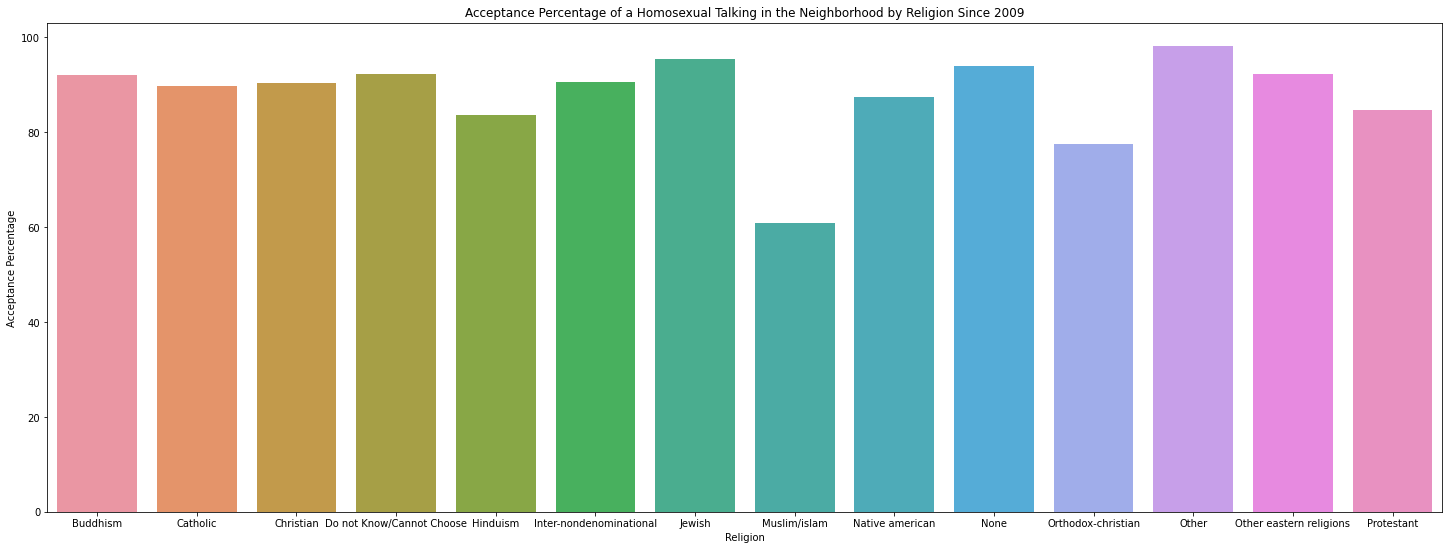

In [20]:
plt.figure(figsize = (25,9))

sns.barplot(x='relig', y='Approval Percentage', data=df_spkhomo_relig_2009)

plt.xlabel('Religion')
plt.ylabel('Acceptance Percentage')
plt.title('Acceptance Percentage of a Homosexual Talking in the Neighborhood by Religion Since 2009')


In [21]:
df_spkhomo_relig = df_updated[['year', 'spkhomo']].groupby(['year', 'spkhomo']).size().unstack().reset_index()


df_spkhomo_relig = df_spkhomo_relig.fillna(0)


df_spkhomo_relig['Approval Percentage'] = 100 * (df_spkhomo_relig['ALLOWED'] / (df_spkhomo_relig['ALLOWED'] + df_spkhomo_relig['NOT ALLOWED'] + df_spkhomo_relig['Do not Know/Cannot Choose']))

df_spkhomo_relig

spkhomo,year,ALLOWED,Do not Know/Cannot Choose,NOT ALLOWED,Approval Percentage
0,1973,913,56,532,60.826116
1,1974,925,67,491,62.373567
2,1976,927,47,522,61.965241
3,1977,944,56,528,61.780105
4,1980,967,46,455,65.871935
5,1982,1182,84,585,63.857374
6,1984,1000,52,416,68.119891
7,1985,1022,52,456,66.797386
8,1987,1221,49,544,67.309813
9,1988,681,37,257,69.846154


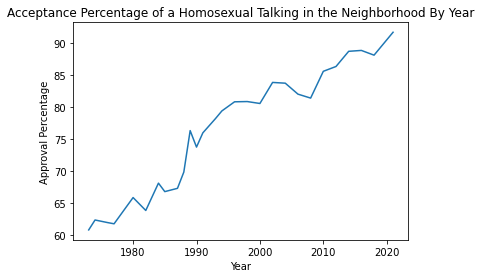

In [22]:
sns.lineplot(x='year', y='Approval Percentage', data=df_spkhomo_relig)

plt.xlabel('Year')
plt.ylabel('Approval Percentage')
plt.title('Acceptance Percentage of a Homosexual Talking in the Neighborhood By Year')

plt.show()

In [23]:
df_spkhomo_party = df_2009[['partyid', 'spkhomo']].groupby(['partyid', 'spkhomo']).size().unstack().reset_index()


df_spkhomo_party = df_spkhomo_party.fillna(0)


df_spkhomo_party['Approval Percentage'] = 100 * (df_spkhomo_party['ALLOWED'] / (df_spkhomo_party['ALLOWED'] + df_spkhomo_party['NOT ALLOWED'] + df_spkhomo_party['Do not Know/Cannot Choose']))

df_spkhomo_party

spkhomo,partyid,ALLOWED,Do not Know/Cannot Choose,NOT ALLOWED,Approval Percentage
0,"Independent, close to democrat",1063,3,89,92.034632
1,"Independent, close to republican",773,8,70,90.834313
2,"Independent, neutral",1406,27,215,85.315534
3,Not very strong democrat,1251,16,157,87.851124
4,Not very strong republican,942,7,110,88.951841
5,Other party,239,1,15,93.725490
6,Strong democrat,1419,6,163,89.357683
7,Strong republican,799,9,142,84.105263


Text(0.5, 1.0, 'Acceptance Percentage of a Homosexual Talking in the Neighborhood by Party Since 2009')

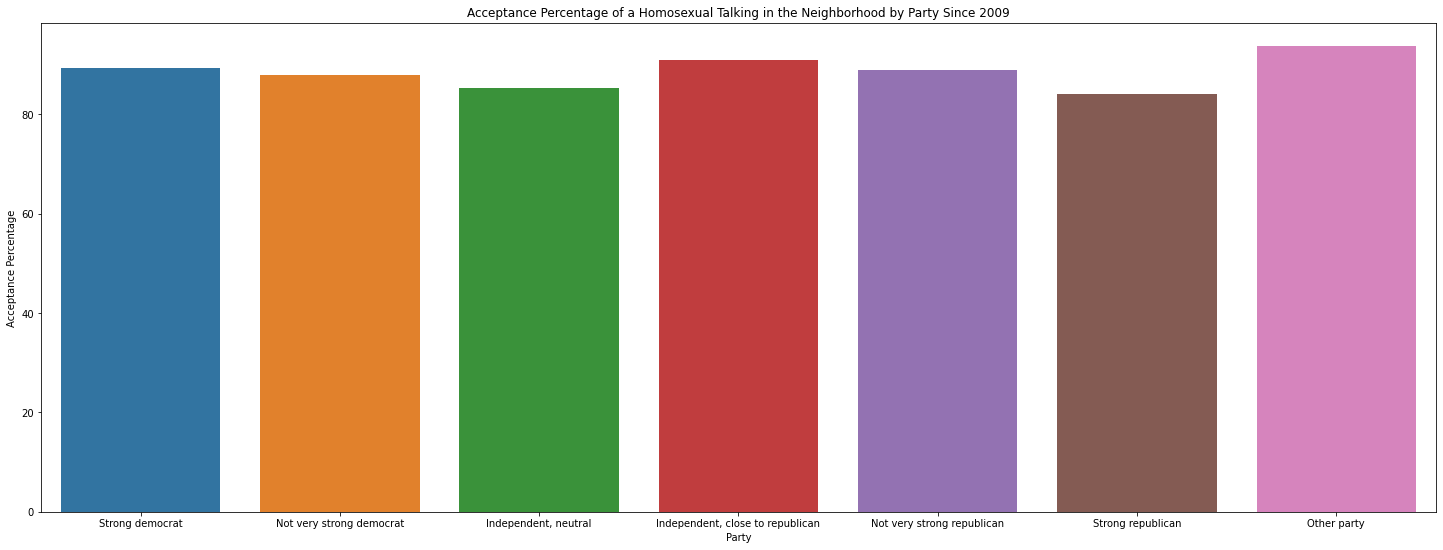

In [24]:
plt.figure(figsize = (25,9))
order = ["Strong democrat", "Not very strong democrat", "Independent, neutral",  "Independent, close to republican", "Not very strong republican", "Strong republican", "Other party"]

sns.barplot(x='partyid', y='Approval Percentage', data=df_spkhomo_party, order = order)

plt.xlabel('Party')
plt.ylabel('Acceptance Percentage')
plt.title('Acceptance Percentage of a Homosexual Talking in the Neighborhood by Party Since 2009')


In [25]:
df_spkrac_relig_2009 = df_2009[['relig', 'spkrac']].groupby(['relig', 'spkrac']).size().unstack().reset_index()


df_spkrac_relig_2009 = df_spkrac_relig_2009.fillna(0)


df_spkrac_relig_2009['Approval Percentage'] = 100 * (df_spkrac_relig_2009['ALLOWED'] / (df_spkrac_relig_2009['ALLOWED'] + df_spkrac_relig_2009['NOT ALLOWED'] + df_spkrac_relig_2009['Do not Know/Cannot Choose']))

df_spkrac_relig_2009

spkrac,relig,ALLOWED,Do not Know/Cannot Choose,NOT ALLOWED,Approval Percentage
0,Buddhism,51.0,0.0,34.0,60.000000
1,Catholic,1160.0,20.0,1075.0,51.441242
2,Christian,189.0,2.0,150.0,55.425220
3,Do not Know/Cannot Choose,13.0,4.0,5.0,59.090909
4,Hinduism,24.0,1.0,29.0,44.444444
5,Inter-nondenominational,23.0,1.0,10.0,67.647059
6,Jewish,107.0,6.0,67.0,59.444444
7,Muslim/islam,19.0,2.0,36.0,33.333333
8,Native american,5.0,0.0,3.0,62.500000
9,None,1390.0,27.0,869.0,60.804899


Text(0.5, 1.0, 'Acceptance Percentage of a Racist Speech in the Neighborhood by Religion Since 2009')

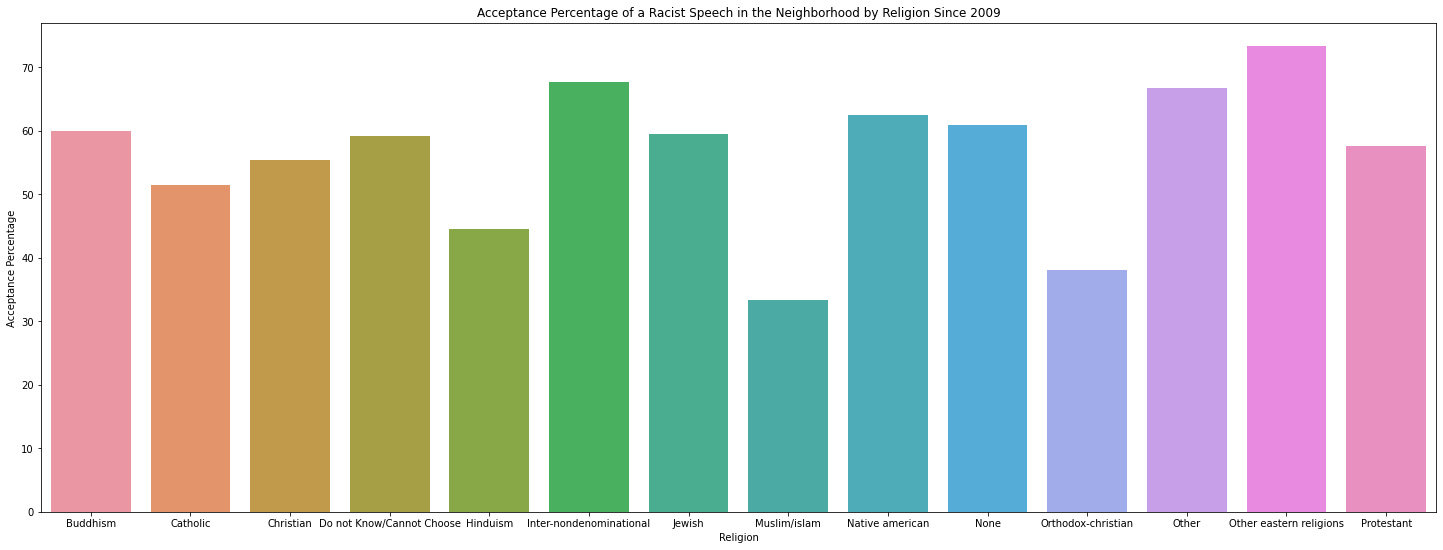

In [26]:
plt.figure(figsize = (25,9))

sns.barplot(x='relig', y='Approval Percentage', data=df_spkrac_relig_2009)

plt.xlabel('Religion')
plt.ylabel('Acceptance Percentage')
plt.title('Acceptance Percentage of a Racist Speech in the Neighborhood by Religion Since 2009')


In [27]:
df_spkrac_relig = df_updated[['year', 'spkrac']].groupby(['year', 'spkrac']).size().unstack().reset_index()


df_spkrac_relig = df_spkrac_relig.fillna(0)


df_spkrac_relig['Approval Percentage'] = 100 * (df_spkrac_relig['ALLOWED'] / (df_spkrac_relig['ALLOWED'] + df_spkrac_relig['NOT ALLOWED'] + df_spkrac_relig['Do not Know/Cannot Choose']))

df_spkrac_relig

spkrac,year,ALLOWED,Do not Know/Cannot Choose,NOT ALLOWED,Approval Percentage
0,1976,909.0,28.0,558.0,60.802676
1,1977,893.0,27.0,605.0,58.557377
2,1980,902.0,39.0,523.0,61.612022
3,1982,1045.0,55.0,754.0,56.364617
4,1984,844.0,31.0,594.0,57.454050
5,1985,848.0,38.0,645.0,55.388635
6,1987,1074.0,35.0,699.0,59.402655
7,1988,596.0,22.0,356.0,61.190965
8,1989,637.0,20.0,370.0,62.025316
9,1990,573.0,20.0,319.0,62.828947


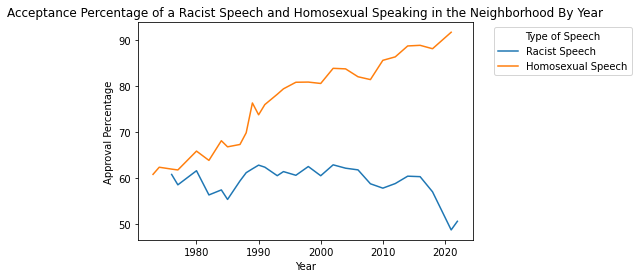

In [28]:
sns.lineplot(x='year', y='Approval Percentage', data=df_spkrac_relig, label='Racist Speech')

plt.xlabel('Year')
plt.ylabel('Approval Percentage')
plt.title('Acceptance Percentage of a Racist Speech and Homosexual Speaking in the Neighborhood By Year')

sns.lineplot(x='year', y='Approval Percentage', data=df_spkhomo_relig, label='Homosexual Speech')


plt.legend(title='Type of Speech', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [29]:
df_spkrac_party = df_2009[['partyid', 'spkrac']].groupby(['partyid', 'spkrac']).size().unstack().reset_index()


df_spkrac_party = df_spkrac_party.fillna(0)


df_spkrac_party['Approval Percentage'] = 100 * (df_spkrac_party['ALLOWED'] / (df_spkhomo_party['ALLOWED'] + df_spkrac_party['NOT ALLOWED'] + df_spkrac_party['Do not Know/Cannot Choose']))

df_spkrac_party

spkrac,partyid,ALLOWED,Do not Know/Cannot Choose,NOT ALLOWED,Approval Percentage
0,"Independent, close to democrat",743,4,536,46.350593
1,"Independent, close to republican",607,9,335,54.341987
2,"Independent, neutral",1011,46,871,43.521309
3,Not very strong democrat,806,22,758,39.684884
4,Not very strong republican,730,10,428,52.898551
5,Other party,208,2,90,62.839879
6,Strong democrat,950,14,825,42.072631
7,Strong republican,675,8,398,56.016598


Text(0.5, 1.0, 'Acceptance Percentage of a Racist Speech in the Neighborhood by Party Since 2009')

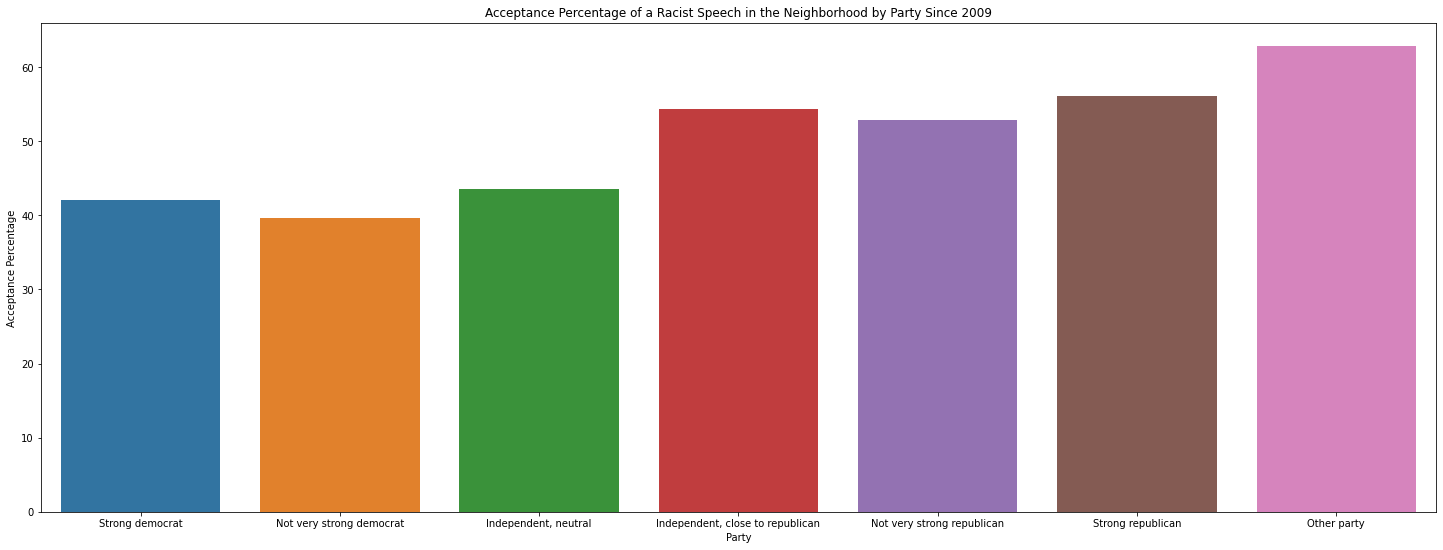

In [30]:
plt.figure(figsize = (25,9))

order = ["Strong democrat", "Not very strong democrat", "Independent, neutral",  "Independent, close to republican", "Not very strong republican", "Strong republican", "Other party"]

sns.barplot(x='partyid', y='Approval Percentage', data=df_spkrac_party, order = order)

plt.xlabel('Party')
plt.ylabel('Acceptance Percentage')
plt.title('Acceptance Percentage of a Racist Speech in the Neighborhood by Party Since 2009')



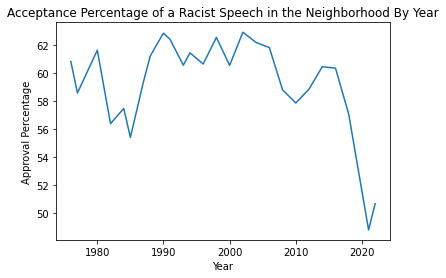

In [31]:
sns.lineplot(x='year', y='Approval Percentage', data=df_spkrac_relig)

plt.xlabel('Year')
plt.ylabel('Approval Percentage')
plt.title('Acceptance Percentage of a Racist Speech in the Neighborhood By Year')

plt.show()

In [32]:
df_educ_party = df_2009[['partyid', 'educ']].groupby(['partyid', 'educ']).size().unstack().reset_index()


df_educ_party = df_educ_party.fillna(0)



df_educ_party

educ,partyid,1 year of college,12th grade,2 years of college,3 years of college,4 years of college,5 years of college,5th grade,6 years of college,7 years of college,8 or more years of college,No formal schooling,Some Elementary,Some Secondary
0,"Independent, close to democrat",175.0,534.0,296.0,136.0,518.0,128.0,3.0,175.0,59.0,114.0,5.0,11.0,261.0
1,"Independent, close to republican",138.0,489.0,263.0,88.0,345.0,88.0,2.0,109.0,30.0,62.0,1.0,3.0,188.0
2,"Independent, neutral",289.0,1175.0,520.0,161.0,467.0,123.0,13.0,134.0,46.0,98.0,15.0,48.0,649.0
3,Not very strong democrat,228.0,710.0,360.0,186.0,565.0,132.0,5.0,189.0,76.0,142.0,5.0,16.0,317.0
4,Not very strong republican,196.0,596.0,291.0,110.0,502.0,82.0,1.0,133.0,45.0,64.0,1.0,9.0,166.0
5,Other party,37.0,122.0,56.0,41.0,115.0,41.0,0.0,32.0,19.0,28.0,1.0,1.0,38.0
6,Strong democrat,250.0,717.0,419.0,162.0,695.0,175.0,6.0,271.0,111.0,211.0,3.0,21.0,325.0
7,Strong republican,187.0,607.0,307.0,109.0,417.0,82.0,4.0,112.0,37.0,61.0,2.0,0.0,168.0


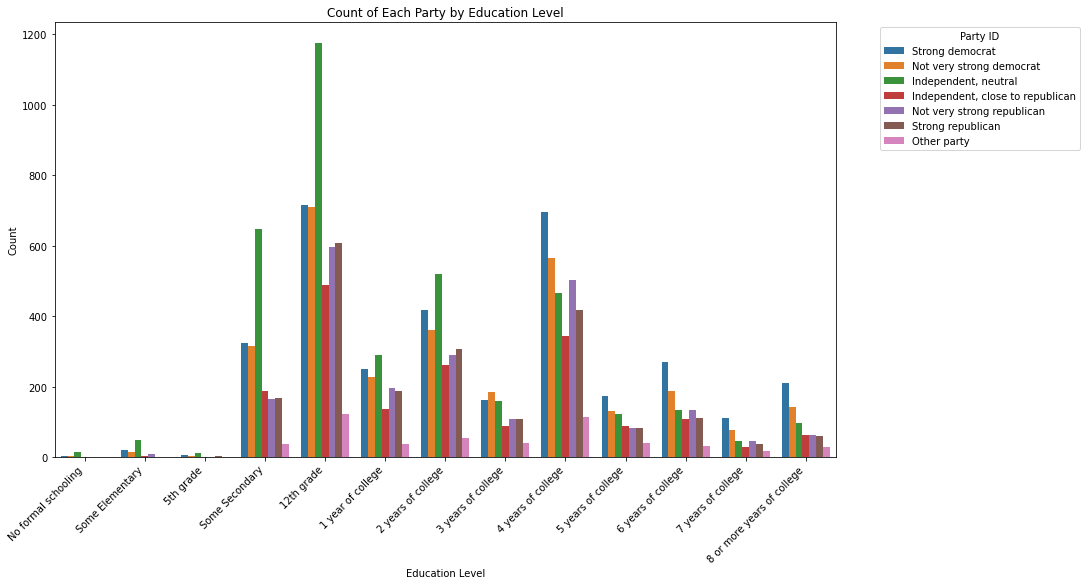

In [33]:
df_melted = df_educ_party.melt(id_vars='partyid', var_name='Education', value_name='Count') # chat gpt helped with melting

education_order = [
    'No formal schooling', 'Some Elementary', '5th grade', 'Some Secondary',
    '12th grade', '1 year of college', '2 years of college', '3 years of college', 
    '4 years of college', '5 years of college', '6 years of college', 
    '7 years of college', '8 or more years of college'
]

order = ["Strong democrat", "Not very strong democrat", "Independent, neutral",  "Independent, close to republican", "Not very strong republican", "Strong republican", "Other party"]


plt.figure(figsize=(14, 8))
sns.barplot(x='Education', y='Count', hue='partyid', data=df_melted, order=education_order,  hue_order = order)

plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Count of Each Party by Education Level')
plt.legend(title='Party ID', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=45, ha='right')

plt.show()

In [34]:
df_hompop_year = df_updated[['year', 'hompop']].groupby(['year']).mean().unstack().reset_index()
df_hompop_year['average_hompop'] = df_hompop_year[df_hompop_year.columns[2]]

df_hompop_year[['year', 'average_hompop']]

,year,average_hompop
0,1972,3.508989
1,1973,3.335329
2,1974,3.342105
3,1975,3.169128
4,1976,3.060788
5,1977,2.983660
6,1978,2.915144
7,1980,2.777248
8,1982,2.748387
9,1983,2.833021


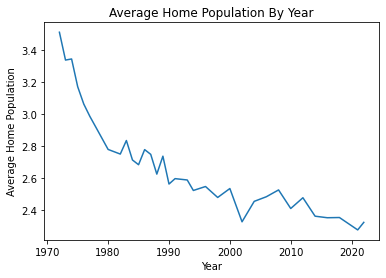

In [35]:
sns.lineplot(x='year', y='average_hompop', data=df_hompop_year)

plt.xlabel('Year')
plt.ylabel('Average Home Population')
plt.title('Average Home Population By Year')

plt.show()

In [36]:
df_2009_adult = df_2009[df_updated['age'] > 18]

df_2009_adult.head()

C:\Users\karan\AppData\Local\Temp/ipykernel_30492/1236461436.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_2009_adult = df_2009[df_updated['age'] > 18]


,year,id_,wrkstat,marital,divorce,age,educ,sex,race,hompop,partyid,spkrac,spkhomo,relig
53043,2010,1,Working full time,Never married,NaN,31.0,4 years of college,MALE,Other,1.0,Not very strong democrat,NaN,NaN,Catholic
53044,2010,2,Working full time,Never married,NaN,23.0,4 years of college,FEMALE,White,1.0,Not very strong democrat,NaN,NaN,None
53045,2010,3,Retired,Divorced,NaN,71.0,Some Secondary,FEMALE,Black,1.0,Strong democrat,NOT ALLOWED,NOT ALLOWED,Catholic
53046,2010,4,Retired,Widowed,NO,82.0,Some Secondary,FEMALE,White,1.0,Strong republican,NaN,NaN,Catholic
53047,2010,5,Retired,Married,NO,78.0,No formal schooling,FEMALE,Black,2.0,"Independent, neutral",NOT ALLOWED,ALLOWED,Protestant


In [37]:
df_marital_relig = df_2009_adult[['relig', 'marital']].groupby(['relig', 'marital']).size().unstack().reset_index()


df_marital_relig = df_marital_relig.fillna(0)


df_marital_relig['Married Rate'] = 100 * (df_marital_relig['Married'] / (df_marital_relig['Divorced'] + df_marital_relig['Married'] + df_marital_relig['Never married'] + df_marital_relig['Separated'] + df_marital_relig['Widowed']))

df_marital_relig

marital,relig,Divorced,Married,Never married,Separated,Widowed,Married Rate
0,Buddhism,33.0,68.0,40.0,7.0,13.0,42.236025
1,Catholic,610.0,1954.0,1053.0,144.0,353.0,47.496354
2,Christian,118.0,241.0,188.0,25.0,25.0,40.368509
3,Do not Know/Cannot Choose,4.0,20.0,12.0,2.0,0.0,52.631579
4,Hinduism,3.0,68.0,25.0,2.0,2.0,68.000000
5,Inter-nondenominational,11.0,15.0,21.0,3.0,6.0,26.785714
6,Jewish,56.0,164.0,68.0,6.0,30.0,50.617284
7,Muslim/islam,10.0,61.0,32.0,3.0,4.0,55.454545
8,Native american,5.0,6.0,5.0,2.0,2.0,30.000000
9,None,704.0,1590.0,1783.0,134.0,159.0,36.384439


Text(0.5, 1.0, 'Married Rate of Adult Population by Religion Since 2009')

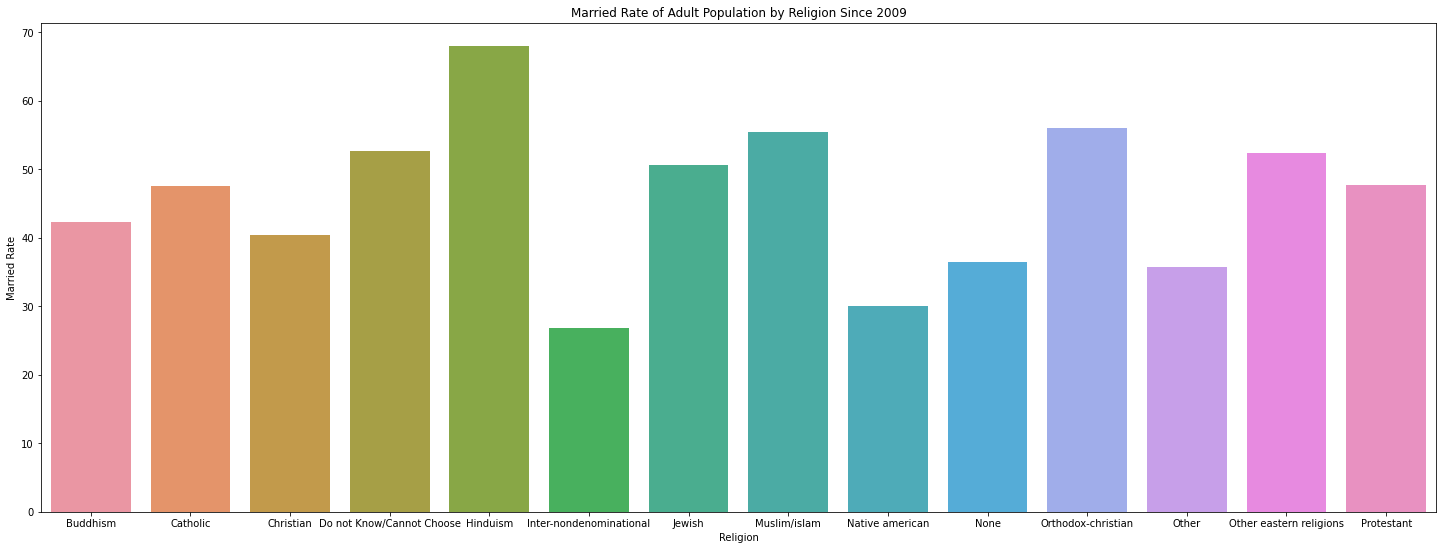

In [38]:
plt.figure(figsize = (25,9))

sns.barplot(x='relig', y='Married Rate', data=df_marital_relig)

plt.xlabel('Religion')
plt.ylabel('Married Rate')
plt.title('Married Rate of Adult Population by Religion Since 2009')


In [39]:
df_divorce_relig = df_2009_adult[['relig', 'divorce']].groupby(['relig', 'divorce']).size().unstack().reset_index()


df_divorce_relig = df_divorce_relig.fillna(0)


df_divorce_relig['Divorce Rate'] = 100 * (df_divorce_relig['YES'] / (df_divorce_relig['YES'] + df_divorce_relig['NO']))

df_divorce_relig

divorce,relig,NO,YES,Divorce Rate
0,Buddhism,63,18,22.222222
1,Catholic,1880,422,18.331885
2,Christian,198,68,25.563910
3,Do not Know/Cannot Choose,17,3,15.000000
4,Hinduism,66,4,5.714286
5,Inter-nondenominational,17,3,15.000000
6,Jewish,146,47,24.352332
7,Muslim/islam,54,11,16.923077
8,Native american,6,2,25.000000
9,None,1309,435,24.942661


Text(0.5, 1.0, 'Divorce Rate of Adult Population by Religion Since 2009')

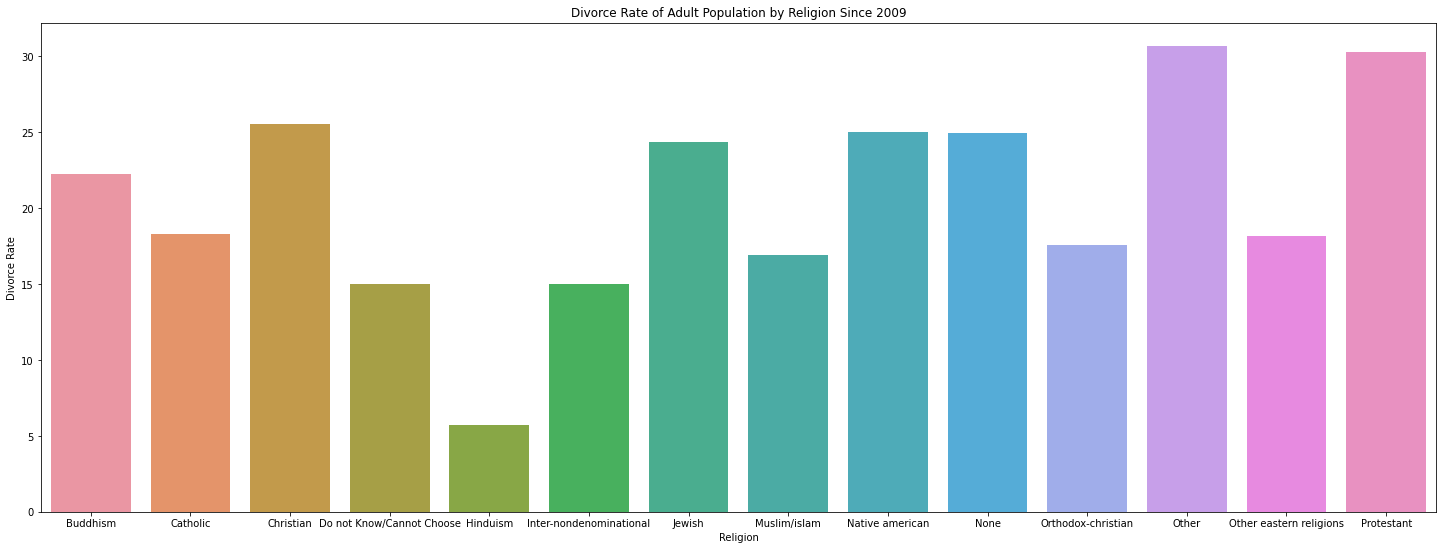

In [40]:
plt.figure(figsize = (25,9))

sns.barplot(x='relig', y='Divorce Rate', data=df_divorce_relig)

plt.xlabel('Religion')
plt.ylabel('Divorce Rate')
plt.title('Divorce Rate of Adult Population by Religion Since 2009')


In [41]:
df_adult = df_updated[df_updated['age'] > 18]

df_adult.head()

,year,id_,wrkstat,marital,divorce,age,educ,sex,race,hompop,partyid,spkrac,spkhomo,relig
0,1972,1,Working full time,Never married,NaN,23.0,4 years of college,FEMALE,White,1.0,"Independent, close to democrat",NaN,NaN,Jewish
1,1972,2,Retired,Married,NO,70.0,Some Secondary,MALE,White,2.0,Not very strong democrat,NaN,NaN,Catholic
2,1972,3,Working part time,Married,NO,48.0,12th grade,FEMALE,White,4.0,"Independent, neutral",NaN,NaN,Protestant
3,1972,4,Working full time,Married,NO,27.0,5 years of college,FEMALE,White,2.0,Not very strong democrat,NaN,NaN,Other
4,1972,5,Keeping house,Married,NO,61.0,12th grade,FEMALE,White,2.0,Strong democrat,NaN,NaN,Protestant


In [42]:
df_divorce_year = df_adult[['year', 'divorce']].groupby(['year', 'divorce']).size().unstack().reset_index()


df_divorce_year = df_divorce_year.fillna(0)


df_divorce_year['Divorce Rate'] = 100 * (df_divorce_year['YES'] / (df_divorce_year['YES'] + df_divorce_year['NO']))

df_divorce_year

divorce,year,NO,YES,Divorce Rate
0,1972,1076,181,14.399364
1,1973,1032,157,13.204373
2,1974,1009,165,14.054514
3,1975,963,174,15.303430
4,1976,973,154,13.664596
5,1977,942,179,15.967886
6,1978,922,177,16.105551
7,1980,865,169,16.344294
8,1982,971,226,18.880535
9,1983,933,184,16.472695


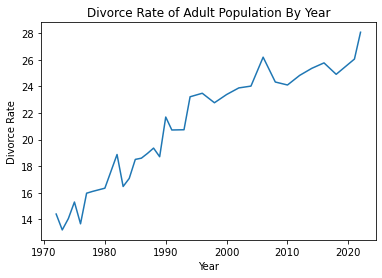

In [43]:
sns.lineplot(x='year', y='Divorce Rate', data=df_divorce_year)

plt.xlabel('Year')
plt.ylabel('Divorce Rate')
plt.title('Divorce Rate of Adult Population By Year')

plt.show()

In [44]:
df_wrkstat_sex_year = df_adult[['year', 'sex', 'wrkstat']].groupby(['year', 'sex', 'wrkstat']).size().unstack().reset_index()


df_wrkstat_sex_year = df_wrkstat_sex_year.fillna(0)

df_wrkstat_sex_year = df_wrkstat_sex_year.drop('Retired', axis=1)
df_wrkstat_sex_year = df_wrkstat_sex_year.drop('Unemployed, laid off, looking for work', axis=1)
df_wrkstat_sex_year = df_wrkstat_sex_year.drop('With a job, but not at work because of temporary illness, vacation, strike', axis=1)


#df_work_sex_year['Divorce Rate'] = 100 * (df_divorce_year['YES'] / (df_divorce_year['YES'] + df_divorce_year['NO']))

df_wrkstat_sex_year

wrkstat,year,sex,In school,Keeping house,Working full time,Working part time
0,1972,FEMALE,16.0,427.0,200.0,79.0
1,1972,MALE,38.0,4.0,548.0,40.0
2,1973,FEMALE,21.0,416.0,207.0,101.0
3,1973,MALE,35.0,2.0,444.0,31.0
4,1974,FEMALE,18.0,409.0,215.0,78.0
...,...,...,...,...,...,...
65,2021,MALE,31.0,34.0,822.0,115.0
66,2021,Other,1.0,0.0,4.0,3.0
67,2022,FEMALE,48.0,206.0,705.0,209.0
68,2022,MALE,41.0,45.0,785.0,116.0


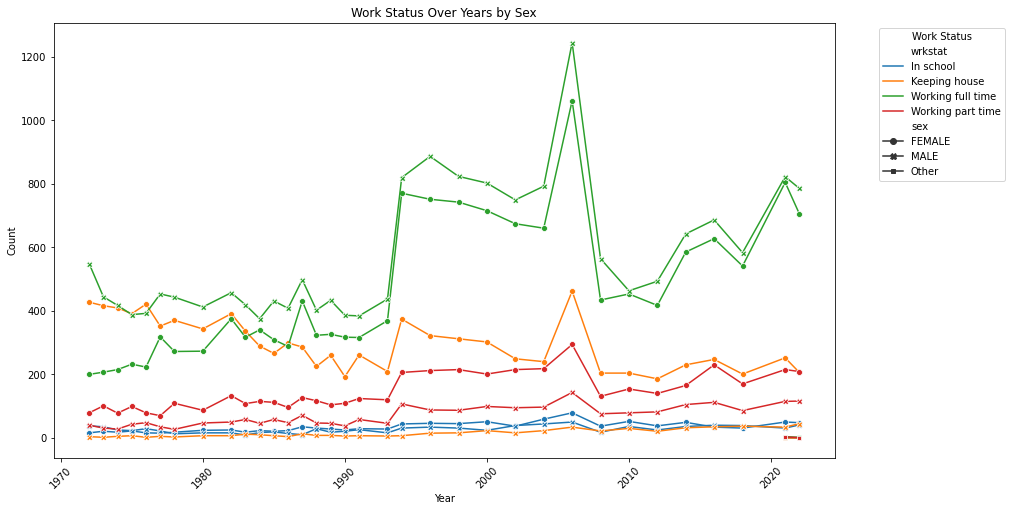

In [45]:

df_melted_wrkstat_sex_year = df_wrkstat_sex_year.melt(id_vars=['year', 'sex'], var_name='wrkstat', value_name='Count') # helped by chatgpt

plt.figure(figsize=(14, 8))
sns.lineplot(data=df_melted_wrkstat_sex_year, x='year', y='Count', hue='wrkstat', style='sex', markers=True, dashes=False)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Work Status Over Years by Sex')
plt.legend(title='Work Status', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

# 5. Findings (300-500 words) 

For my data, I was primarily interested in how different groups of people thought about race and LGBTQ+ rights, and how this has changed over time. I was also interested in seeing how the amount of women in the workforce has changed over time.

My first finding was that people have become more accepting of LGBTQ+ rights over time. Even with more people accepting the LGBTQ+ community, certain groups are still much less accepting. One point to note is that the acceptance percentage is measured based on the variable 'spkhomo', which collects the response of people to the question: "Supposed admitted homosexual wanted to make a speech in your community. Should he be allowed to speak, or not?" This doesn't necessarily measure homophobia, but could be a good measure. Also, it uses the word "homosexual," which is why the graphs use that word. Response-wise, people of Islamic faith had the lowest acceptance, which was not a surprise due to their religious beliefs. For the same reason, I was not surprised that no religion ("None") had one of the higher acceptance rates. I was surprised that Judaism had the highest acceptance, though.

I also found how different parties felt about this subject. I was not surprised that 'Strong Republicans' had the lowest acceptance rate. The Republican Party holds an anti-LGBTQ+ platform, so their lower acceptance is not surprising. One thing to note is that this data only contains information from the year 2009 and onwards because since that time period, pro-LGBTQ+ viewpoints became more common.

The next section of my findings focused on anti-racism speech. The findings center around the variable 'spkrac,' which represents the answers to the question: "If a person wanted to make a speech in your community claiming that Blacks are inferior, should he be allowed to speak, or not?" This variable is meant to gauge certain groups' thoughts on race. The findings showed that Islam had the lowest tolerance for hate speech. I was quite surprised that their rate was so much lower than everyone else's (~33.33%). I was also surprised to see that no religion was pretty high at ~60.80%. I am surprised because I thought atheists (no religion) tend to be more liberal (as seen by the 'spkhomo' variable). I would think they would be more anti-hate speech.

Other findings I discovered through my data analysis are:

* Average home population has decreased over time.

* Hindus (and other religions, less so) are most likely to be currently married as adults. No religion is one of the least.

* Hindus are the least divorced religious group, while Protestants are the highest.

* The divorce rate has increased over time.

* Women have started working more since 1991, but still are "keeping house" at a much larger rate than men.